### Import modules




In [8]:
%matplotlib inline 

# open matplotlib plots inline

import numpy as np
import pandas as pd 
import scipy
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## VIDEO 1

### Read in the data


In [3]:
NBA = pd.read_csv("NBA_train.csv")
print(NBA.head())
print(NBA.dtypes)
print(NBA.describe())
print(NBA.shape)

   SeasonEnd                 Team  Playoffs   W   PTS  oppPTS    FG   FGA  \
0       1980        Atlanta Hawks         1  50  8573    8334  3261  7027   
1       1980       Boston Celtics         1  61  9303    8664  3617  7387   
2       1980        Chicago Bulls         0  30  8813    9035  3362  6943   
3       1980  Cleveland Cavaliers         0  37  9360    9332  3811  8041   
4       1980       Denver Nuggets         0  30  8878    9240  3462  7470   

     2P   2PA   3P  3PA    FT   FTA   ORB   DRB   AST  STL  BLK   TOV  
0  3248  6952   13   75  2038  2645  1369  2406  1913  782  539  1495  
1  3455  6965  162  422  1907  2449  1227  2457  2198  809  308  1539  
2  3292  6668   70  275  2019  2592  1115  2465  2152  704  392  1684  
3  3775  7854   36  187  1702  2205  1307  2381  2108  764  342  1370  
4  3379  7215   83  255  1871  2539  1311  2524  2079  746  404  1533  
SeasonEnd     int64
Team         object
Playoffs      int64
W             int64
PTS           int64
oppPT

## VIDEO 2

### How many wins to make the playoffs?


In [4]:
tab = NBA.groupby(['W', 'Playoffs']).size()
tab.unstack()

Playoffs,0,1
W,,
11,2.0,NaN
12,2.0,NaN
13,2.0,NaN
14,2.0,NaN
15,10.0,NaN
16,2.0,NaN
17,11.0,NaN
18,5.0,NaN
19,10.0,NaN


### Compute Points Difference


In [22]:
NBA['PTSdiff'] = NBA.PTS - NBA.oppPTS
print(NBA.head())

   SeasonEnd                 Team  Playoffs   W   PTS  oppPTS    FG   FGA  \
0       1980        Atlanta Hawks         1  50  8573    8334  3261  7027   
1       1980       Boston Celtics         1  61  9303    8664  3617  7387   
2       1980        Chicago Bulls         0  30  8813    9035  3362  6943   
3       1980  Cleveland Cavaliers         0  37  9360    9332  3811  8041   
4       1980       Denver Nuggets         0  30  8878    9240  3462  7470   

     2P   2PA   ...     3PA    FT   FTA   ORB   DRB   AST  STL  BLK   TOV  \
0  3248  6952   ...      75  2038  2645  1369  2406  1913  782  539  1495   
1  3455  6965   ...     422  1907  2449  1227  2457  2198  809  308  1539   
2  3292  6668   ...     275  2019  2592  1115  2465  2152  704  392  1684   
3  3775  7854   ...     187  1702  2205  1307  2381  2108  764  342  1370   
4  3379  7215   ...     255  1871  2539  1311  2524  2079  746  404  1533   

   PTSdiff  
0      239  
1      639  
2     -222  
3       28  
4     -36

### Check for linear relationship

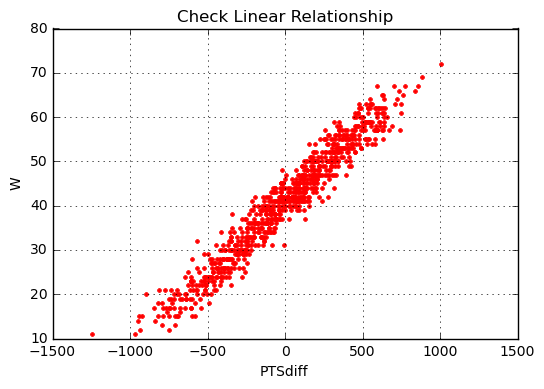

In [23]:
plt.figure()
plt.title('Check Linear Relationship')
plt.xlabel('PTSdiff')
plt.ylabel('W')
plt.plot(NBA.PTSdiff, NBA.W, 'r.')
plt.grid(True)
plt.show()

### Linear regression model for wins


In [24]:
feature_cols = ['PTSdiff']
X = NBA[feature_cols]
y = NBA.W
WinsReg = LinearRegression()
WinsReg.fit(X, y)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
print WinsReg.intercept_
print WinsReg.coef_

# Sum of Squared Errors
print(WinsReg.score(X,y))

41.0
[ 0.03258633]
0.94234248197


## VIDEO 3

### Linear regression model for points scored

In [27]:
feature_cols = ['2PA', '3PA', 'FTA', 'AST', 'ORB', 'DRB', 'TOV', 'STL', 'BLK']
X = NBA[feature_cols]
y = NBA.PTS
PointsReg = LinearRegression()
PointsReg.fit(X, y)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
print PointsReg.intercept_
print PointsReg.coef_

# R-squared or Sum of Squared Errors
print(PointsReg.score(X,y))

-2050.81081277
[ 1.04287845  1.25859058  1.12801702  0.88576709 -0.95538673  0.03882744
 -0.0247526  -0.19917749 -0.05576374]
0.899155295593
